In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Preprocessing

In [2]:
#Import data set 
df = pd.read_csv('heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

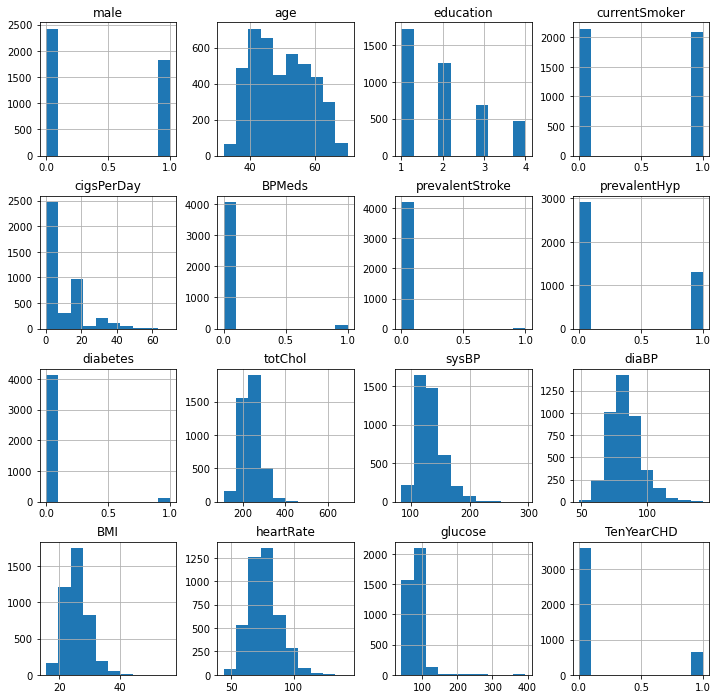

In [6]:
df.hist(figsize=(12,12))

In [7]:
# Alternative a - Drop all Null Value 
df.dropna(axis = 0, inplace = True)
# Alternative b - fill missing values based on feature charateristics 
# X = df_X.fillna({'cigsPerDay': 0, 'BPMeds': 0 ,'totChol': df_X['totChol'].std(),
#                  'BMI':df_X['BMI'].mean(), 'glucose':df_X['glucose'].mean(),
#                  'heartRate' : df_X['heartRate'].std()})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [9]:
#Check ifnull 
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:>

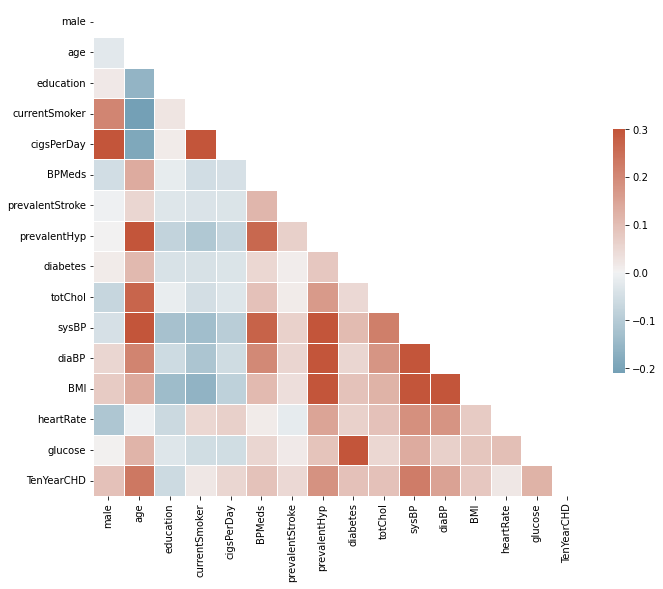

In [10]:
# Compute the correlation matrix
df_corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
#Correlation matrix - How each feature correlates with the target variable
std_corr = df.corr()
std_corr['TenYearCHD'].sort_values(ascending = False)

TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
male               0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
education         -0.063068
Name: TenYearCHD, dtype: float64

In [12]:
#Inbalance Classes 
df.TenYearCHD.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

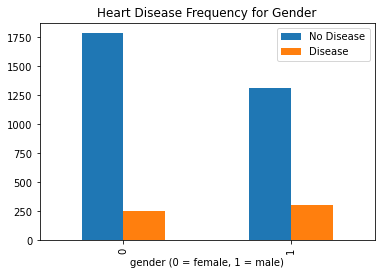

In [13]:
#Discover Which Gender Are More Prone to Heart Disease
pd.crosstab(df.male, df.TenYearCHD).plot(kind = 'bar', figsize = (6,4))
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('gender (0 = female, 1 = male)')
plt.legend(['No Disease', 'Disease'])

We discover that male are more prone to heart diseases

## Logistic Model 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
#Drop least correlated features 
X = df.drop(columns = ['education','heartRate','TenYearCHD','currentSmoker'], axis=1)
y = df['TenYearCHD']

In [16]:
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,81.0
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,79.0
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0


In [17]:
#Detect Multi-Collinearity using VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.1,male
1,40.3,age
2,1.8,cigsPerDay
3,1.1,BPMeds
4,1.0,prevalentStroke
5,2.3,prevalentHyp
6,1.6,diabetes
7,31.1,totChol
8,136.4,sysBP
9,128.7,diaBP


In [18]:
# Standardization 
from sklearn.preprocessing import StandardScaler
# Split categorical and non-categorical data 
all_cols = X.columns.values.tolist()
cat_cols = ['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
non_cat_cols = [i for i in all_cols if i not in cat_cols]
# Standardize non categorical data 
X_non_cat_cols = X[non_cat_cols]
scaler = StandardScaler().fit(X[non_cat_cols])
X_non_cat_scaled = pd.DataFrame(scaler.transform(X[non_cat_cols]), columns = non_cat_cols)
X_non_cat_scaled

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose
0,-1.233351,-0.757068,-0.949714,-1.193695,-1.078415,0.291688,-0.203127
1,-0.415591,-0.757068,0.297729,-0.514637,-0.159695,0.724614,-0.244956
2,-0.181945,0.921174,0.184325,-0.220378,-0.243215,-0.109261,-0.495930
3,1.336754,1.760294,-0.269291,0.798209,1.009584,0.687717,0.884427
4,-0.415591,1.172910,1.091556,-0.107202,0.090864,-0.660258,0.131505
...,...,...,...,...,...,...,...
3651,0.986285,-0.757068,-1.131161,0.390774,-0.159695,-0.202734,-0.035811
3652,2.154514,-0.757068,-1.380649,1.613079,1.176624,-0.650419,-0.119469
3653,0.051701,-0.673156,1.726618,2.111055,0.759024,0.045707,0.173334
3654,0.168524,2.851151,-0.677545,-0.265649,-0.243215,-1.494133,-0.579588


In [19]:
# One-hot encoding using dummy 
dummy_cols = pd.get_dummies(X[cat_cols], columns=cat_cols, drop_first=True)
dummy_cols

,male_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,0,0
...,...,...,...,...,...
4231,1,0,0,1,0
4232,1,0,0,1,0
4233,1,0,0,1,0
4234,1,0,0,0,0


In [20]:
#Join Categorical and Numerical Data After Standardization and One-hot Encode 
X = pd.concat([X_non_cat_scaled, dummy_cols.set_index(X_non_cat_scaled.index)], axis=1)
X_all_cols = X.columns.values.tolist()

In [21]:
X

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,male_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,-1.233351,-0.757068,-0.949714,-1.193695,-1.078415,0.291688,-0.203127,1,0,0,0,0
1,-0.415591,-0.757068,0.297729,-0.514637,-0.159695,0.724614,-0.244956,0,0,0,0,0
2,-0.181945,0.921174,0.184325,-0.220378,-0.243215,-0.109261,-0.495930,1,0,0,0,0
3,1.336754,1.760294,-0.269291,0.798209,1.009584,0.687717,0.884427,0,0,0,1,0
4,-0.415591,1.172910,1.091556,-0.107202,0.090864,-0.660258,0.131505,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.986285,-0.757068,-1.131161,0.390774,-0.159695,-0.202734,-0.035811,1,0,0,1,0
3652,2.154514,-0.757068,-1.380649,1.613079,1.176624,-0.650419,-0.119469,1,0,0,1,0
3653,0.051701,-0.673156,1.726618,2.111055,0.759024,0.045707,0.173334,1,0,0,1,0
3654,0.168524,2.851151,-0.677545,-0.265649,-0.243215,-1.494133,-0.579588,1,0,0,0,0


In [22]:
#Split the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(2559, 12)
(2559,)
(1097, 12)
(1097,)


In [24]:
#Logisitc Model Estimator and Fitting 
logmodel = LogisticRegression(solver = 'liblinear', random_state=0)
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_val)
print('Prediction:', y_pred[:20])
print('Actual:', list(y[:20]))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


Feature : 0 has score  : -0.19809495252260767 
Feature : 1 has score  : -0.08188647662018829 
Feature : 2 has score  : 0.041191694634111216 
Feature : 3 has score  : 0.10804007984622058 
Feature : 4 has score  : 0.15880598526702075 
Feature : 5 has score  : 0.2085598667434557 
Feature : 6 has score  : 0.22754651226024417 
Feature : 7 has score  : 0.3479850703537336 
Feature : 8 has score  : 0.39588906447075684 
Feature : 9 has score  : 0.4867567062482274 
Feature : 10 has score  : 0.5076198301437042 
Feature : 11 has score  : 0.544051508114554 


Text(0.5, 0, 'Logistic Model Feature Importance')

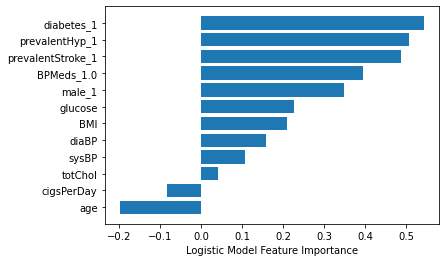

In [25]:
#Feature Importance 
importance=logmodel.coef_[0]
importance=np.sort(importance)
importance
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))
plt.barh(X_all_cols, importance)
plt.xlabel("Logistic Model Feature Importance")

In [26]:
#Print Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[933,   6],
       [147,  11]])

In [27]:
# Print model performance matrix
print(metrics.classification_report(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("F1_score:",metrics.f1_score(y_val, y_pred))
print("Accuracy:",metrics.accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       939
           1       0.65      0.07      0.13       158

    accuracy                           0.86      1097
   macro avg       0.76      0.53      0.52      1097
weighted avg       0.83      0.86      0.81      1097

Precision: 0.6470588235294118
Recall: 0.06962025316455696
F1_score: 0.12571428571428572
Accuracy: 0.8605287146763901


In [28]:
#lasso regression
lasso_logmode2 = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state=0)
lasso_logmode2.fit(X_train, y_train)
y_pred2 = lasso_logmode2.predict(X_val)

In [29]:
# Print model performance matrix for lasso regularization
print("Precision:",metrics.precision_score(y_val, y_pred2))
print("Recall:",metrics.recall_score(y_val, y_pred2))
print("F1_score:",metrics.f1_score(y_val, y_pred2))
print("Accuracy:",metrics.accuracy_score(y_val,y_pred2))

Precision: 0.6666666666666666
Recall: 0.06329113924050633
F1_score: 0.11560693641618497
Accuracy: 0.8605287146763901


AUC of the dataset is 76.46%


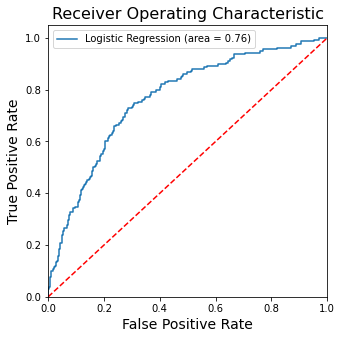

In [30]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve

logit_roc_auc = metrics.roc_auc_score(y_val, lasso_logmode2.predict_proba(X_val)[:,1])
fpr, tpr, thresholds = roc_curve(y_val, lasso_logmode2.predict_proba(X_val)[:,1])
print(f'AUC of the dataset is {metrics.roc_auc_score(y_val, lasso_logmode2.predict_proba(X_val)[:,1]):.2%}')

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc="best")
plt.show()

In [31]:
print(f'AUC above shows that there is {metrics.roc_auc_score(y_val, lasso_logmode2.predict_proba(X_val)[:,1]):.2%} chance that the model will be able to distinguish between positive class and negative class')

AUC above shows that there is 76.46% chance that the model will be able to distinguish between positive class and negative class


In [32]:
#Validate the Model Using Cross Validation 
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lasso_logmode2, X, y, cv=5)
cv_results

{'fit_time': array([0.00773716, 0.00971818, 0.00703621, 0.00876117, 0.00969172]),
 'score_time': array([0.00163198, 0.00174308, 0.00223088, 0.00166297, 0.00185227]),
 'test_score': array([0.85245902, 0.85499316, 0.84815321, 0.85772914, 0.85088919])}

In [33]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.853 +/- 0.003
